In [1]:
from importlib import reload
import utils; reload(utils)
from utils import *
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

Using cuDNN version 5105 on context None
Preallocating 2867/4095 Mb (0.700000) on cuda0
Mapped name None to device cuda0: GeForce GTX 650 (0000:01:00.0)
Using Theano backend.


In [145]:
%matplotlib inline
import os, random
from shutil import copytree
data_path =  '/Volumes/Backups/data/LUNA16/patches/'

In [146]:
theano.config.dnn.conv.precision = 'float32'
print(theano.config.dnn.conv.precision)

float32


In [147]:
#for i in range(5):
#    patches1 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches1/"))
#    patches0 = random.choice(os.listdir("/Volumes/Backups/data/LUNA16/patches/patches0/"))
#    try:
#        copytree(data_path + 'patches1/' + patches1, '/Volumes/Backups/data/LUNA16/patches/sample2/patches1/' + patches1)
#    except FileExistsError:
#        continue
#    try:
#        copytree(data_path + 'patches0/' + patches0, '/Volumes/Backups/data/LUNA16/patches/sample2/patches0/' + patches0)
#    except FileExistsError:
#        continue

In [148]:
import numpy as np
np.set_printoptions(precision=4,linewidth=100)
import pandas as pd
from vgg16bn import Vgg16BN

In [149]:
model = vgg_ft_bn(2)

/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_3 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


GraphToGPU convolution2d_48_W convolution2d_48_W
GraphToGPU convolution2d_49_W convolution2d_49_W
GraphToGPU convolution2d_50_W convolution2d_50_W
GraphToGPU convolution2d_51_W convolution2d_51_W
GraphToGPU convolution2d_52_W convolution2d_52_W
GraphToGPU convolution2d_53_W convolution2d_53_W
GraphToGPU convolution2d_54_W convolution2d_54_W
GraphToGPU convolution2d_55_W convolution2d_55_W
GraphToGPU convolution2d_56_W convolution2d_56_W
GraphToGPU convolution2d_57_W convolution2d_57_W
GraphToGPU convolution2d_58_W convolution2d_58_W
GraphToGPU convolution2d_59_W convolution2d_59_W
GraphToGPU convolution2d_60_W convolution2d_60_W


In [150]:
from vgg16bn import Vgg16BN
model = vgg_ft_bn(2)


/Users/rungsunan/anaconda/envs/py35/lib/python3.5/site-packages/keras/layers/core.py:577: UserWarning: `output_shape` argument not specified for layer lambda_4 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


GraphToGPU convolution2d_61_W convolution2d_61_W
GraphToGPU convolution2d_62_W convolution2d_62_W
GraphToGPU convolution2d_63_W convolution2d_63_W
GraphToGPU convolution2d_64_W convolution2d_64_W
GraphToGPU convolution2d_65_W convolution2d_65_W
GraphToGPU convolution2d_66_W convolution2d_66_W
GraphToGPU convolution2d_67_W convolution2d_67_W
GraphToGPU convolution2d_68_W convolution2d_68_W
GraphToGPU convolution2d_69_W convolution2d_69_W
GraphToGPU convolution2d_70_W convolution2d_70_W
GraphToGPU convolution2d_71_W convolution2d_71_W
GraphToGPU convolution2d_72_W convolution2d_72_W
GraphToGPU convolution2d_73_W convolution2d_73_W


In [151]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_4 (Lambda)                (None, 3, 224, 224)   0           lambda_input_4[0][0]             
____________________________________________________________________________________________________
zeropadding2d_40 (ZeroPadding2D) (None, 3, 226, 226)   0           lambda_4[0][0]                   
____________________________________________________________________________________________________
GraphToGPU Shape.0 Shape.0
GraphToGPU Shape.0 Shape.0
convolution2d_61 (Convolution2D) (None, 64, 224, 224)  1792        zeropadding2d_40[0][0]           
____________________________________________________________________________________________________
zeropadding2d_41 (ZeroPadding2D) (None, 64, 226, 226)  0           convolution2d_61[0][0]           
_____________________________________

In [152]:
model.compile(optimizer=Adam(1e-3),
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [153]:
from skimage import color

In [154]:
np.sctypes

{'complex': [numpy.complex64, numpy.complex128, numpy.complex256],
 'float': [numpy.float16, numpy.float32, numpy.float64, numpy.float128],
 'int': [numpy.int8, numpy.int16, numpy.int32, numpy.int64],
 'others': [bool, object, bytes, str, numpy.void],
 'uint': [numpy.uint8, numpy.uint16, numpy.uint32, numpy.uint64]}

In [155]:
np_img = np.zeros((1,224,224))

In [156]:
np_img


array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]])

In [157]:
import glob2
from skimage import color
image_labels = []
img_array = np.zeros((1,3,224,224),dtype=np.float32)
print(type(img_array[0][0][0][0]))
i=0
#for filename in glob2.glob(data_path+'sample/*/*'):
for filename in (os.listdir(data_path + "full/")):
    print(filename)
    for image in  glob2.glob(data_path + "full/" + filename+'/*'):
        if (filename == 'patches0'):
            image_labels.append(np.int16(0.0))
            print(type(image_labels[0]))
        else:
            image_labels.append(np.int16(1.0))
        print ("imagename: " + image)
        img = color.gray2rgb(load_array(image)).astype(np.float32)
        print("img type: " + str(type(img[0][0][0])))
        np_img = np.transpose(np.asarray(img,dtype=np.float32),(2,0,1))
        print(np_img.shape)
        print("np_img type : " + str(type(np_img[0][0][0])))
        tmp_img = np.zeros((1,3,224,224),dtype=np.float32)
        print(tmp_img.shape)
        print("tmp_img type : " + str(type(tmp_img[0][0][0][0])))
        tmp_img[0] = np_img
        print("np.shape: " + str(tmp_img.shape))
        img_array = np.concatenate((img_array, tmp_img))
        print("img_array.shape :" + str(img_array.shape))
        i += 1
img_array = img_array[1:]



<class 'numpy.float32'>
patches0
<class 'numpy.int16'>
imagename: /Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100225287222365663678666836860_439751_224x224.bc
img type: <class 'numpy.float32'>
(3, 224, 224)
np_img type : <class 'numpy.float32'>
(1, 3, 224, 224)
tmp_img type : <class 'numpy.float32'>
np.shape: (1, 3, 224, 224)
img_array.shape :(2, 3, 224, 224)
<class 'numpy.int16'>
imagename: /Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274652_224x224.bc
img type: <class 'numpy.float32'>
(3, 224, 224)
np_img type : <class 'numpy.float32'>
(1, 3, 224, 224)
tmp_img type : <class 'numpy.float32'>
np.shape: (1, 3, 224, 224)
img_array.shape :(3, 3, 224, 224)
<class 'numpy.int16'>
imagename: /Volumes/Backups/data/LUNA16/patches/full/patches0/1.3.6.1.4.1.14519.5.2.1.6279.6001.100332161840553388986847034053_274829_224x224.bc
img type: <class 'numpy.float32'>
(3, 224, 224)
np_img type 

In [158]:
img_array.nbytes

2021892096

In [159]:
len(img_array)

3358

In [93]:
print(type(np_img[0][0][0]))

<class 'numpy.float32'>


In [160]:
 img_array.shape

(3358, 3, 224, 224)

In [161]:
img.shape

(224, 224, 3)

In [96]:
type(img[0][0][0])

numpy.float32

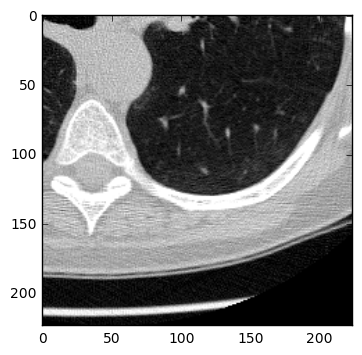

In [97]:
plt.imshow(img_array[13][2],cmap=plt.cm.gray)

In [98]:
type(img_array[0][0][0][0])

numpy.float32

In [99]:
len(image_labels)

319

In [100]:
type(image_labels[19])

numpy.int16

In [101]:
ohe_image_labels = to_categorical(np.array(np.float32(image_labels))).astype(np.float32)

In [102]:
type(ohe_image_labels[0][0])

numpy.float32

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
trn_labels, val_labels = train_test_split(ohe_image_labels, test_size=0.2, random_state=42)

In [105]:
trn,val = train_test_split(img_array, test_size=0.2, random_state=42,)

In [106]:
trn.shape

(255, 3, 224, 224)

In [107]:
type(val[0][0][1][0])

numpy.float32

In [108]:
batch_size = 4

In [109]:
type(val[1][0][1][0])

numpy.float32

In [110]:
model.fit(trn, 
          trn_labels, 
          batch_size=batch_size, 
          nb_epoch=1, 
          validation_data=(val, val_labels),verbose = 1)


Train on 255 samples, validate on 64 samples
Epoch 1/1
255/255 [==============================] - 40s - loss: 2.6943 - acc: 0.5176 - val_loss: 0.6939 - val_acc: 0.4844

In [111]:
model.save_weights(data_path+'results/ft1.h5')

In [112]:
conv_layers,fc_layers = split_at(model, Convolution2D)

In [113]:
conv_layers

In [114]:
conv_model = Sequential(conv_layers)

In [115]:
%time conv_trn_feat = conv_model.predict(trn)

MergeOptimizer Constant{1} Constant{1}
MergeOptimizer Constant{1} Constant{1}
MergeOptimizer Constant{0} Constant{0}
MergeOptimizer Constant{1} Constant{1}
MergeOptimizer Constant{2} Constant{2}
MergeOptimizer Constant{3} Constant{3}
MergeOptimizer Constant{2} Constant{2}
MergeOptimizer Subtensor{int64}.0 Subtensor{int64}.0
MergeOptimizer Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
MergeOptimizer Constant{3} Constant{3}
MergeOptimizer Subtensor{int64}.0 Subtensor{int64}.0
MergeOptimizer Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
MergeOptimizer Constant{1} Constant{1}
MergeOptimizer Constant{1} Constant{1}
MergeOptimizer Constant{0} Constant{0}
MergeOptimizer Constant{1} Constant{1}
MergeOptimizer Constant{2} Constant{2}
MergeOptimizer Constant{3} Constant{3}
MergeOptimizer Constant{2} Constant{2}
MergeOptimizer Subtensor{int64}.0 Subtensor{int64}.0
MergeOptimizer Elemwise{add,no_inplace}.0 Elemwise{add,no_inplace}.0
MergeOptimizer Constant{3} Constant{3}
MergeOptim

In [116]:
conv_trn_feat.shape

(255, 512, 14, 14)

In [117]:
%time conv_val_feat = conv_model.predict(val)

CPU times: user 7.6 s, sys: 45.4 ms, total: 7.65 s
Wall time: 7.68 s


In [118]:
conv_val_feat.shape

(64, 512, 14, 14)

In [47]:
save_array(data_path+'results/conv_val_feat.dat', conv_val_feat)

In [119]:
type(conv_trn_feat[0][0][0][0])


numpy.float32

In [120]:
nf=128; p=0

In [135]:
def get_lrg_layers():
    return [
        BatchNormalization(axis=1, input_shape=conv_layers[-1].output_shape[1:]),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
        Convolution2D(nf,3,3, activation='relu', border_mode='same'),
        BatchNormalization(axis=1),
        MaxPooling2D(),
#         Convolution2D(nf,3,3, activation='relu', border_mode='same'),
#         BatchNormalization(axis=1),
#         MaxPooling2D((2,2)),
        Convolution2D(2,3,3, border_mode='same'),
        Dropout(p),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ]


In [136]:
lrg_model = Sequential(get_lrg_layers())

GraphToGPU convolution2d_45_W convolution2d_45_W
GraphToGPU convolution2d_46_W convolution2d_46_W
GraphToGPU convolution2d_47_W convolution2d_47_W


In [137]:
lrg_model.input_shape, lrg_model.output_shape

((None, 512, 14, 14), (None, 2))

In [134]:
lrg_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
GraphToGPU Shape.0 Shape.0
GraphToGPU Shape.0 Shape.0
GraphToGPU Shape.0 Shape.0
GraphToGPU Shape.0 Shape.0
batchnormalization_20 (BatchNorm (None, 512, 14, 14)   2048        batchnormalization_input_5[0][0] 
____________________________________________________________________________________________________
GraphToGPU Shape.0 Shape.0
GraphToGPU Shape.0 Shape.0
convolution2d_42 (Convolution2D) (None, 128, 14, 14)   589952      batchnormalization_20[0][0]      
____________________________________________________________________________________________________
GraphToGPU Shape.0 Shape.0
GraphToGPU Shape.0 Shape.0
GraphToGPU Shape.0 Shape.0
GraphToGPU Shape.0 Shape.0
batchnormalization_21 (BatchNorm (None, 128, 14, 14)   512         convolution2d_42[0][0]           
_______________________

In [138]:
lrg_model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [139]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=1, 
              validation_data=(conv_val_feat, val_labels))


MergeOptimizer Constant{0} Constant{0}
MergeOptimizer Constant{0} Constant{0}
MergeOptimizer TensorConstant{(2,) of 0} TensorConstant{(2,) of 0}
MergeOptimizer TensorConstant{(2,) of 2} TensorConstant{(2,) of 2}
MergeOptimizer TensorConstant{(2,) of 2} TensorConstant{(2,) of 2}
MergeOptimizer TensorConstant{(2,) of 2} TensorConstant{(2,) of 2}
MergeOptimizer TensorConstant{[  1 512   1   1]} TensorConstant{[  1 512   1   1]}
MergeOptimizer TensorConstant{[  1 512   1   1]} TensorConstant{[  1 512   1   1]}
MergeOptimizer TensorConstant{[  1 512   1   1]} TensorConstant{[  1 512   1   1]}
MergeOptimizer TensorConstant{[  1 128   1   1]} TensorConstant{[  1 128   1   1]}
MergeOptimizer TensorConstant{[  1 128   1   1]} TensorConstant{[  1 128   1   1]}
MergeOptimizer TensorConstant{[  1 128   1   1]} TensorConstant{[  1 128   1   1]}
MergeOptimizer TensorConstant{[  1 128   1   1]} TensorConstant{[  1 128   1   1]}
MergeOptimizer TensorConstant{[  1 128   1   1]} TensorConstant{[  1 128 

In [140]:
lrg_model.optimizer.lr = 0.00001

In [144]:
lrg_model.fit(conv_trn_feat, trn_labels, batch_size=8, nb_epoch=30, 
              validation_data=(conv_val_feat, val_labels))


Train on 255 samples, validate on 64 samples
Epoch 1/30
255/255 [==============================] - 1s - loss: 0.3454 - acc: 0.8196 - val_loss: 1.2123 - val_acc: 0.5625

In [ ]:
unresArr198 = load_array('/Volumes/Backups/data/unlabeled_patient_collapsed_images-198x3x224x224.bc')

In [ ]:
unlabeledPredictionvgg = lrg_model.predict(unresArr198, batch_size=8, verbose=1)

In [ ]:
#conv_feat = load_array(data_root + 'results/conv_feat.dat')
#conv_val_feat = load_array(data_root + 'results/conv_val_feat.dat')

In [2]:
print(theano.config)

NameError: name 'theano' is not defined